In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/diabetes_feature.csv')
df.shape

(768, 16)

In [3]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
y = df['Outcome']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 9) (614,)
(154, 9) (154,)


# 머신러닝 알고리즘 사용하기
* [결정 트리 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC)
* [결정 트리 학습법 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95)
* [랜덤 포레스트 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8)
* [배깅 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B0%B0%EA%B9%85)


## Single tree
지니 계수가 0이면 더 이상의 불순물이 섞이지 않은 것, 트리를 그릴수록 작아져

In [6]:
from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(random_state=42)
# model

DecisionTreeClassifier(random_state=42)

## Bagging = Bootstrap aggregating

In [13]:
from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators =100, random_state=42)
# model

RandomForestClassifier(random_state=42)

## Boosting
 * https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/
 
 <img src="https://quantdare.com/wp-content/uploads/2016/04/bb3.png" width="600">

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(
                                        #max_depth=10, 
                                   random_state=42)
model

GradientBoostingClassifier(random_state=42)

# 여러 개의 알고리즘을 사용해서 비교하기
RamdomSearchCV 로 여러 알고리즘의 최적의 하이퍼 파라미터를 찾기

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier



estimators = [DecisionTreeClassifier(random_state=42),
                RandomForestClassifier(random_state=42),
                GradientBoostingClassifier(random_state=42)
                ]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [54]:
# results = []
# for estimator in estimators:
#     result =[]
#     result.append(estimator.__class__.__name__) #이름만 출력
#     results.append(result)
# results

[['DecisionTreeClassifier'],
 ['RandomForestClassifier'],
 ['GradientBoostingClassifier']]

In [40]:
# max_depth = np.random.randint(2,20, 10)
# max_features = np.random.uniform(0.3, 1.0, 10)

# max_depth, max_features

(array([ 5, 11, 16, 15,  4, 14,  3,  6, 18, 12]),
 array([0.85549813, 0.30789299, 0.94358669, 0.86988068, 0.73798133,
        0.73576166, 0.39842648, 0.94951822, 0.30651791, 0.74332419]))

In [63]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2,20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions ={"max_depth" : max_depth, 
                      "max_features" : max_features}

results =[]
for estimator in estimators:
    result = []
    
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions['n_estimators'] = np.random.randint(100, 200, 10)
    
    
    
    clf = RandomizedSearchCV(estimator,
                                  param_distributions, 
                                   n_iter=100,
                                   scoring ="accuracy",
                                   n_jobs=-1, 
                                   cv = 5,
                                   verbose = 2
                                    )
    clf.fit(X_train, y_train)
    
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    
    results.append(result)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [65]:
df = pd.DataFrame(results, 
             columns =['estimtor', 'best_params', 'train_score', 'test_score', 'cv_result'])

In [70]:
pd.DataFrame(df.loc[1, "cv_result"]).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
97,1.102166,0.027702,0.042775,0.002259,173,0.630497,14,"{'n_estimators': 173, 'max_features': 0.630497...",0.878049,0.934959,0.853659,0.902439,0.950820,0.903985,0.035667,1
35,1.274883,0.033267,0.048567,0.003520,173,0.688855,13,"{'n_estimators': 173, 'max_features': 0.688854...",0.861789,0.934959,0.869919,0.910569,0.942623,0.903972,0.032975,2
17,1.466921,0.065621,0.053236,0.005024,199,0.688855,13,"{'n_estimators': 199, 'max_features': 0.688854...",0.869919,0.934959,0.861789,0.910569,0.942623,0.903972,0.032975,3
89,1.291385,0.012078,0.056588,0.006311,199,0.630497,14,"{'n_estimators': 199, 'max_features': 0.630497...",0.878049,0.934959,0.861789,0.902439,0.942623,0.903972,0.031330,3
16,0.907617,0.011471,0.041744,0.002832,149,0.51738,9,"{'n_estimators': 149, 'max_features': 0.517379...",0.869919,0.943089,0.869919,0.910569,0.926230,0.903945,0.029625,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,1.010047,0.021582,0.050302,0.001765,186,0.51738,5,"{'n_estimators': 186, 'max_features': 0.517379...",0.861789,0.918699,0.853659,0.886179,0.934426,0.890950,0.031382,93
40,1.132138,0.011775,0.054124,0.002370,186,0.537196,14,"{'n_estimators': 186, 'max_features': 0.537195...",0.853659,0.934959,0.853659,0.894309,0.918033,0.890924,0.033054,97
51,1.616116,0.168940,0.079457,0.012706,186,0.538857,16,"{'n_estimators': 186, 'max_features': 0.538857...",0.853659,0.934959,0.853659,0.894309,0.918033,0.890924,0.033054,97
55,1.489617,0.138261,0.074695,0.012111,186,0.51738,11,"{'n_estimators': 186, 'max_features': 0.517379...",0.853659,0.934959,0.845528,0.894309,0.918033,0.889298,0.034991,99


In [46]:
clf.best_params_

{'max_features': 0.9563102151848484, 'max_depth': 6}

In [47]:
clf.best_score_

0.859962681594029

# 학습과 예측

In [31]:
model.fit(X_train, y_train) #학습
model.feature_importances_

array([1.06409948e-01, 7.04053663e-03, 6.57236021e-02, 3.73742490e-02,
       2.62954875e-02, 9.47259928e-02, 1.56708089e-04, 6.62273475e-01,
       0.00000000e+00])

<Axes: >

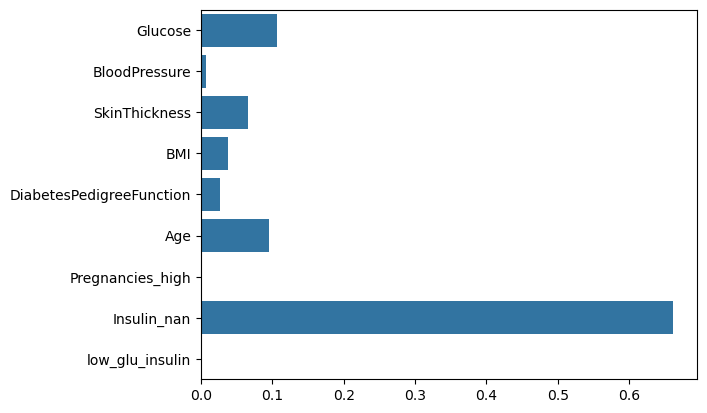

In [32]:
feature_names = X_train.columns.tolist()
sns.barplot(x=model.feature_importances_,
               y=feature_names)

In [33]:
y_predict = model.predict(X_test) #예측값 찾기
y_predict[:5]

array([1, 0, 0, 0, 0], dtype=int64)

# 정확도 측정 Accuracy
* DecisionTree(DT) 
* Random Forest(RF)
* GradientBoosting(GB)

In [34]:
diff_count = (y_predict != y_test).sum()
diff_count
# DT : 28
# RF : 20
# GB : 24

24

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)
# DT: 0.818
# RF: 0.870
# GB: 0.844

0.8441558441558441